In [1]:
import pandas as pd
import numpy as np
import panel as pn #used for building dashboard using Jupyter Notebooks
pn.extension('tabulator') #used for making tables

import hvplot.pandas #helps plotting the dashboard

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")

In [3]:
# cache data to improve dashboard performance
if 'data' not in pn.state.cache.keys():

    df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

    pn.state.cache['data'] = df.copy()

else: 

    df = pn.state.cache['data']

In [4]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.157,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.156,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.155,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47410,Zimbabwe,2018,ZWE,15052191.0,2.678627e+10,0.558,0.037,10.715,1.419,15.265,...,NaN,0.114,0.001,0.001,0.002,0.0,116.76,29.37,-0.088,-0.825
47411,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,0.473,0.031,9.775,-0.939,-8.765,...,NaN,0.113,0.001,0.001,0.002,0.0,116.03,28.70,0.143,1.463
47412,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,0.496,0.032,7.850,-1.926,-19.700,...,NaN,0.112,0.001,0.001,0.002,0.0,113.20,25.99,0.818,10.421
47413,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,0.531,0.033,8.396,0.547,6.962,...,NaN,0.110,0.001,0.001,0.002,0.0,NaN,NaN,1.088,12.956


In [5]:
df[df['country'] == 'North America']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
30956,North America,1750,NaN,11396206.0,NaN,0.000,0.000,0.000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30957,North America,1751,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30958,North America,1752,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30959,North America,1753,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30960,North America,1754,NaN,NaN,NaN,0.000,NaN,0.000,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31224,North America,2018,NaN,585864285.0,NaN,74.292,0.128,6599.176,180.933,2.819,...,8.856,22.445,0.052,0.279,0.345,0.014,7690.65,7809.65,388.745,5.891
31225,North America,2019,NaN,590497015.0,NaN,74.841,0.128,6489.115,-110.061,-1.668,...,8.787,22.305,0.053,0.282,0.348,0.014,7572.73,7692.71,381.623,5.881
31226,North America,2020,NaN,594263186.0,NaN,74.485,0.126,5835.101,-654.013,-10.079,...,8.987,22.163,0.053,0.285,0.351,0.014,6907.83,7023.81,434.364,7.444
31227,North America,2021,NaN,597123384.0,NaN,78.067,0.132,6201.319,366.218,6.276,...,8.950,22.024,0.053,0.288,0.355,0.014,NaN,NaN,514.813,8.302


In [6]:
df[df['country'] == 'World']

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
46623,World,1750,NaN,7.456641e+08,NaN,NaN,NaN,9.306,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46624,World,1751,NaN,NaN,NaN,NaN,NaN,9.407,0.101,1.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46625,World,1752,NaN,NaN,NaN,NaN,NaN,9.505,0.098,1.041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46626,World,1753,NaN,NaN,NaN,NaN,NaN,9.610,0.105,1.108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46627,World,1754,NaN,NaN,NaN,NaN,NaN,9.734,0.123,1.281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46891,World,2018,NaN,7.683790e+09,1.187658e+14,1565.803,0.204,36766.945,741.491,2.058,...,100.0,100.0,0.396,1.064,1.538,0.077,49585.910,48069.809,0.000,0.0
46892,World,2019,NaN,7.764951e+09,1.221494e+14,1615.776,0.208,37040.102,273.158,0.743,...,100.0,100.0,0.401,1.082,1.562,0.079,49880.602,48089.621,0.000,0.0
46893,World,2020,NaN,7.840953e+09,1.185900e+14,1633.047,0.208,35007.738,-2032.366,-5.487,...,100.0,100.0,0.406,1.100,1.586,0.080,47513.148,46120.922,0.000,0.0
46894,World,2021,NaN,7.909295e+09,1.260048e+14,1692.404,0.214,36816.543,1808.806,5.167,...,100.0,100.0,0.411,1.118,1.610,0.081,NaN,NaN,-0.004,-0.0


## Step 1: Data Preprocessing

In [7]:
# Fill NAs with 0s and create GDP per capita column
df = df.fillna(0)
df['gdp_per_capita'] = np.where(df['population']!= 0, df['gdp']/ df['population'], 0)

In [8]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

## Step 2: CO2 emission over time by continent

In [9]:
# Define Panel widgets
year_slider = pn.widgets.IntSlider(name='Year slider', start=1750, end=2020, step=5, value=1850)
year_slider

IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1850)

In [10]:
# Radio buttons for CO2 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['co2', 'co2_per_capita',],
    button_type='success'
)

In [11]:
continents = ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [12]:
co2_pipeline

In [13]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2,line_width=2, title="CO2 emission by continent")
co2_plot

## Step 3: Creating Table for CO2 emission over Time by Continent 

In [14]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
co2_table

## Step 4: CO2 vs GDP scatterplot

In [15]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_per_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [16]:
co2_vs_gdp_scatterplot_pipeline

In [17]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_per_capita', 
                                                                y='co2', 
                                                                by='country', 
                                                                size=80, kind="scatter", 
                                                                alpha=0.7,
                                                                legend=False, 
                                                                height=500, 
                                                                width=500)
co2_vs_gdp_scatterplot

## Step 5: Bar chart with CO2 sources by Continent

In [18]:
# Analysing CO2 emissions based in the source type
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['coal_co2', 'oil_co2', 'gas_co2'], 
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antarctica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')  
    .reset_index(drop=True)
)

In [19]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='country', 
                                                     y=yaxis_co2_source, 
                                                     title='CO2 source by continent')
co2_source_bar_plot

## Step 6: Creating Final Dashboard

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2022314540816] Row
        [0] Column(margin=(0, 25))
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['co2', 'co2_per_capita'], value='co2')
            [1] ParamFunction(function, width=700)
        [1] ParamFunction(function, width=500)
    [2022385242944] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, width=600)
        [1] Column
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['coal_co2', 'oil_co2', ...], value='coal_co2')
            [1] ParamFunction(function, width=600)
    [2022311002512] Markdown(str)
    [2022415620224] Markdown(str)
    [2022415620368] PNG(str, sizing_mode='scale_both')
    [2022415620416] Markdown(str)
    [2022302060208] IntSlider(end=2020, name='Year slider', start=1750, step=5, value=1945)
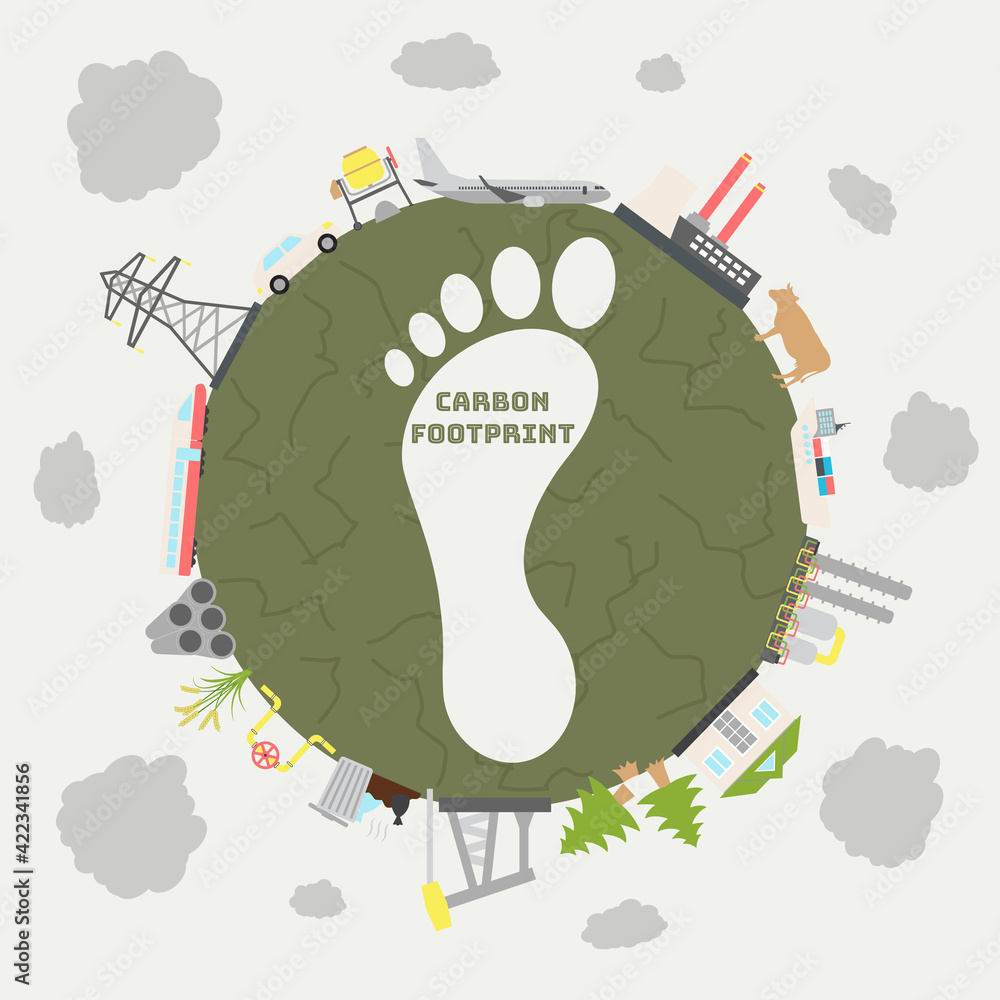

In [24]:
import panel as pn

# Assuming year_slider, yaxis_co2, co2_plot, co2_table, co2_vs_gdp_scatterplot, yaxis_co2_source, co2_source_bar_plot are already defined

template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the leading cause of global climate change. To avert the most severe consequences, it is widely acknowledged that the world must rapidly reduce emissions. However, the debate over how this responsibility should be distributed among regions, nations, and individuals remains a persistent challenge in international discourse."), 
             pn.pane.PNG('D:\ADITYA\Projects\CO2 emission dashboard\CO2 emission.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Year"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()
